#### Assignment

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on the several facets of the state of education on annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Below are the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoints to the data. You should provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Say, we want to understand the relationship between the expenditures of the governments and the students' overall success in the math and reading.

1. Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.
2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?
3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?
4. What is the correlation between the overall score variable and the 1st principal component?
5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this example solution.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)


engine.dispose()



In [2]:
education_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [3]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

#### question 1
Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.

Once NaNs are dropped, all columns have the same number of variables. 

In [4]:
fill_list = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G'] 

In [5]:
states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

In [6]:
education_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          211
TOTAL_REVENUE                   161
FEDERAL_REVENUE                 161
STATE_REVENUE                   161
LOCAL_REVENUE                   161
TOTAL_EXPENDITURE               161
INSTRUCTION_EXPENDITURE         161
SUPPORT_SERVICES_EXPENDITURE    161
OTHER_EXPENDITURE               211
CAPITAL_OUTLAY_EXPENDITURE      161
GRADES_PK_G                      49
GRADES_KG_G                       7
GRADES_4_G                        7
GRADES_8_G                        7
GRADES_12_G                       7
GRADES_1_8_G                      7
GRADES_9_12_G                     7
GRADES_ALL_G                     49
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [7]:
education_df.dropna(inplace = True)

In [8]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 209 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

In [9]:
#my attempte at weighted average
def wavg(group, avg_name, weight_name):
   
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [10]:
scores_m4 = wavg(education_df, 'AVG_MATH_4_SCORE', 'GRADES_4_G')
scores_r4 = wavg(education_df, 'AVG_READING_4_SCORE', 'GRADES_4_G')
scores_m8 = wavg(education_df, 'AVG_MATH_8_SCORE', 'GRADES_8_G')
scores_r8 = wavg(education_df, 'AVG_READING_8_SCORE', 'GRADES_8_G')
wavg_scores = (scores_m4 + scores_r4 + scores_m8 + scores_r8)/4
wavg_scores

249.61398266960157

In [11]:
education_df['overall_wavgscore']= wavg_scores

In [12]:
#sample answer
education_df['overall_score'] = (education_df['GRADES_4_G']*((education_df['AVG_MATH_4_SCORE'] + education_df['AVG_READING_4_SCORE'])*0.5) + education_df['GRADES_8_G']
                                 * ((education_df['AVG_MATH_8_SCORE'] + education_df['AVG_READING_8_SCORE'])*0.5))/(education_df['GRADES_4_G'] + education_df['GRADES_8_G'])

In [13]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,overall_wavgscore,overall_score
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,249.613983,235.106342
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638,249.613983,238.321404
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590,249.613983,240.773675
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451,249.613983,234.719834
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154,249.613983,247.750273


#### question 2
What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?

In [14]:
education_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'overall_score', 'overall_wavgscore']].corr()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,overall_score,overall_wavgscore
TOTAL_EXPENDITURE,1.000000e+00,9.902545e-01,9.929881e-01,9.437020e-01,9.257837e-01,7.415542e-02,2.786699e-16
INSTRUCTION_EXPENDITURE,9.902545e-01,1.000000e+00,9.743985e-01,9.021733e-01,8.847981e-01,8.738559e-02,-6.079000e-16
SUPPORT_SERVICES_EXPENDITURE,9.929881e-01,9.743985e-01,1.000000e+00,9.522823e-01,9.112452e-01,7.900244e-02,-5.054334e-16
OTHER_EXPENDITURE,9.437020e-01,9.021733e-01,9.522823e-01,1.000000e+00,9.181882e-01,1.095916e-02,6.386393e-16
CAPITAL_OUTLAY_EXPENDITURE,9.257837e-01,8.847981e-01,9.112452e-01,9.181882e-01,1.000000e+00,-5.389407e-03,1.563486e-16
overall_score,7.415542e-02,8.738559e-02,7.900244e-02,1.095916e-02,-5.389407e-03,1.000000e+00,2.338366e-15
overall_wavgscore,2.786699e-16,-6.079000e-16,-5.054334e-16,6.386393e-16,1.563486e-16,2.338366e-15,1.000000e+00


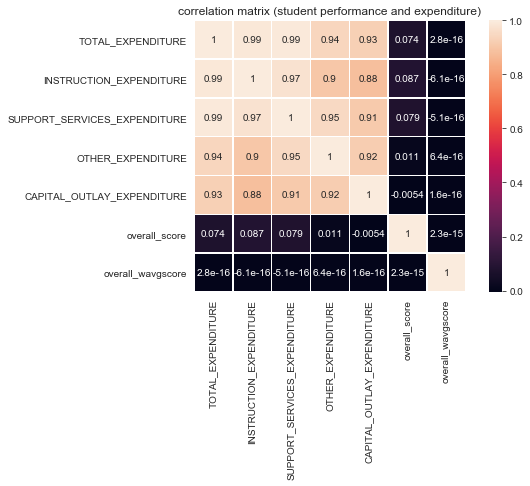

In [16]:
corrmat_student = education_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'overall_score', 'overall_wavgscore']].corr()


plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.yticks(rotation='horizontal')
plt.title("correlation matrix (student performance and expenditure)")

plt.show()

The most correlated expenditure type with overall_score is the instruction_expenditure at 0.087 (very weak). 

#### question 3
Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
education_df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.9430175]


In [25]:
education_df = education_df.dropna()
X = education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(X)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)


Covariance Matrix:
 [[1.00215054 0.97649399 0.90411344 0.88670093]
 [0.97649399 1.00215054 0.95433021 0.91320483]
 [0.90411344 0.95433021 1.00215054 0.92016275]
 [0.88670093 0.91320483 0.92016275 1.00215054]]


In [26]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.49872077 -0.508884   -0.50012988 -0.49212272]
Eigenvalue 1: 3.7801819695172623
----------------------------------------
Eigenvector 2: 
[-0.51731724  0.79350501 -0.31927696  0.02819378]
Eigenvalue 2: 0.01399530841987182
----------------------------------------
Eigenvector 3: 
[-0.5998946  -0.31891698  0.24059869  0.69320322]
Eigenvalue 3: 0.13404482102994622
----------------------------------------
Eigenvector 4: 
[ 0.35183367 -0.09838106 -0.76814361  0.52582282]
Eigenvalue 4: 0.08038005157055561
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.9430175  0.00349132 0.03343929 0.02005189]


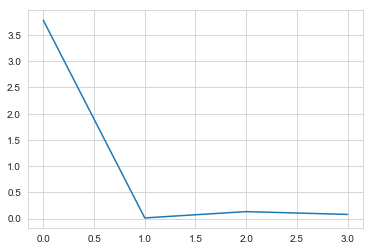

[3.78018197 0.01399531 0.13404482 0.08038005]


In [27]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.9430175  0.03343929 0.02005189 0.00349132]


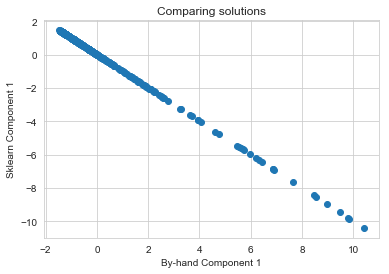

In [29]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [31]:
X = education_df[['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
education_df['pca_1'] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)



The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.9430175]


94% of total variance is explained by the first component. 

#### question 4
What is the correlation between the overall score variable and the 1st principal component?

In [33]:
education_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'overall_score', 'pca_1']].corr()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,overall_score,pca_1
TOTAL_EXPENDITURE,1.000000,0.990255,0.992988,0.943702,0.925784,0.074155,0.992054
INSTRUCTION_EXPENDITURE,0.990255,1.000000,0.974399,0.902173,0.884798,0.087386,0.968606
SUPPORT_SERVICES_EXPENDITURE,0.992988,0.974399,1.000000,0.952282,0.911245,0.079002,0.988345
OTHER_EXPENDITURE,0.943702,0.902173,0.952282,1.000000,0.918188,0.010959,0.971343
CAPITAL_OUTLAY_EXPENDITURE,0.925784,0.884798,0.911245,0.918188,1.000000,-0.005389,0.955792
overall_score,0.074155,0.087386,0.079002,0.010959,-0.005389,1.000000,0.044596
pca_1,0.992054,0.968606,0.988345,0.971343,0.955792,0.044596,1.000000


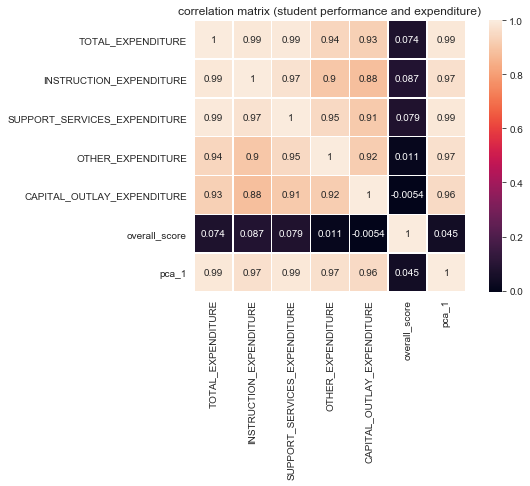

In [34]:
corrmat_student = education_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'overall_score', 'pca_1']].corr()


plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.yticks(rotation='horizontal')
plt.title("correlation matrix (student performance and expenditure)")

plt.show()

pca_1 (0.45) is lower than instruction_expenditure (0.87)and support_services_expenditure (0.74). 

#### question 5
If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

Note: My model seems to differ slightly from the sample.
No. I would choose the instruction_expenditure component over the 1st principal component as it has the highest correlation with overall score. 